# Guassian Naive Bayes

- Implementation from sklearn
- https://scikit-learn.org/stable/modules/naive_bayes.html
- This is just getting a working copy, i will add more in-depth information 

In [77]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
iris=load_iris()


In [79]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
df['target']= iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
X = df.drop(['target'], axis ='columns')
y = df.target



In [85]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
gnb=GaussianNB()
y_pred= gnb.fit(X_train,y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 1


In [88]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

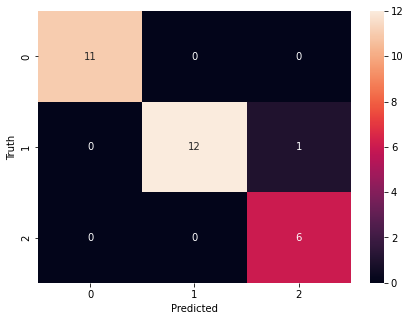

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize= (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

